In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [2]:
df = pd.read_csv("Mall_Customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [21]:
X = df.iloc[:,[3,4]].values

In [80]:
import warnings
warnings.filterwarnings("ignore")

### Finding the total number of required Clustering

In [81]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init="k-means++",n_init="auto",random_state=100)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

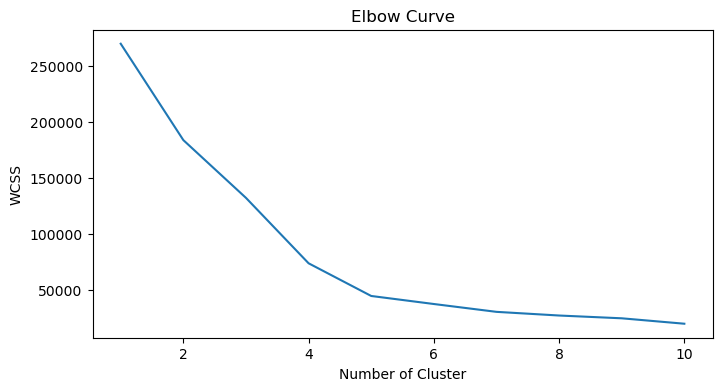

In [85]:
plt.figure(figsize=(8,4))
plt.plot(range(1,11),wcss)
plt.title("Elbow Curve")
plt.xlabel("Number of Cluster")
plt.ylabel("WCSS")
plt.show()

In [84]:
print("From above Elbow Curve choosing number of cluster = 5")

From above Elbow Curve choosing number of cluster = 5


In [56]:
class Kmeans:
    def __init__(self, n_clusters=2, max_iterations=100):
        self.n_clusters = n_clusters
        self.max_iterations = max_iterations
        self.centroids = None
    def fit_predict(self, X):
        random_index = random.sample(range(0,X.shape[0]),self.n_clusters)
        self.centroids = X[random_index]
        #print(self.centroids)
        for i in range(self.max_iterations):
            #assign cluster
            cluster_group = self.assign_cluster(X)
            #print(cluster_group.shape[0])
            #more cemtroids
            old_centroids = self.centroids
            self.centroids = self.move_centroids(X, cluster_group)
            #check finish
            if (old_centroids == self.centroids).all():
                break
        return cluster_group, self.centroids
    def assign_cluster(self, X):
        cluster_group = []
        distances = []
        for row in X:
            for centroid in self.centroids:
                distances.append(np.sqrt(np.dot(row-centroid, row-centroid)))
            #print(distances)
            min_distance = min(distances)
            index_pos = distances.index(min_distance)
            cluster_group.append(index_pos)
            distances.clear()
        return np.array(cluster_group)
    def move_centroids(self, X, cluster_group):
        new_centroids = []
        cluster_type = np.unique(cluster_group)
        for type in cluster_type:
            new_centroids.append(X[cluster_group == type].mean(axis=0))
        return np.array(new_centroids)
            
        

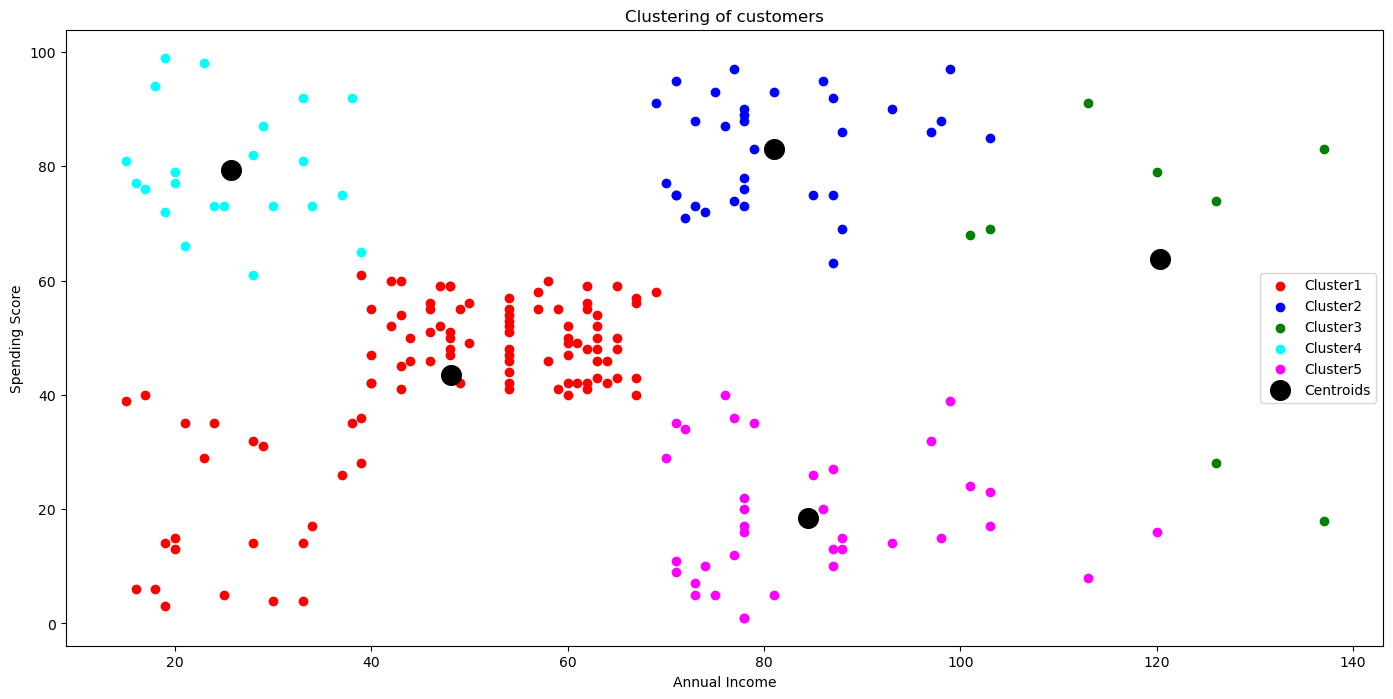

In [70]:
km = Kmeans(n_clusters=5, max_iterations=100)
y_means, centroids = km.fit_predict(X)
plt.figure(figsize=(17,8))
plt.scatter(X[y_means==0,0],X[y_means==0,1],color='red',label='Cluster1')
plt.scatter(X[y_means==1,0],X[y_means==1,1],color='blue',label='Cluster2')
plt.scatter(X[y_means==2,0],X[y_means==2,1],color='green',label='Cluster3')
plt.scatter(X[y_means==3,0],X[y_means==3,1],color='cyan',label='Cluster4')
plt.scatter(X[y_means==4,0],X[y_means==4,1],color='magenta',label='Cluster5')
plt.scatter(centroids[:, 0], centroids[:, 1], s = 200, c = 'black', label = 'Centroids')
plt.title("Clustering of customers")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.legend()
plt.show()


### Using Scikit Learn

In [87]:
kmeans = KMeans(n_clusters=5,init="k-means++",n_init="auto",random_state=26)
y_means = kmeans.fit_predict(X)

In [88]:
y_means

array([2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 4,
       2, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 3, 1, 4, 1, 3, 1, 3, 1,
       4, 1, 3, 1, 3, 1, 3, 1, 3, 1, 4, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

In [93]:
kmeans.cluster_centers_

array([[25.72727273, 79.36363636],
       [86.53846154, 82.12820513],
       [26.30434783, 20.91304348],
       [88.2       , 17.11428571],
       [55.2962963 , 49.51851852]])

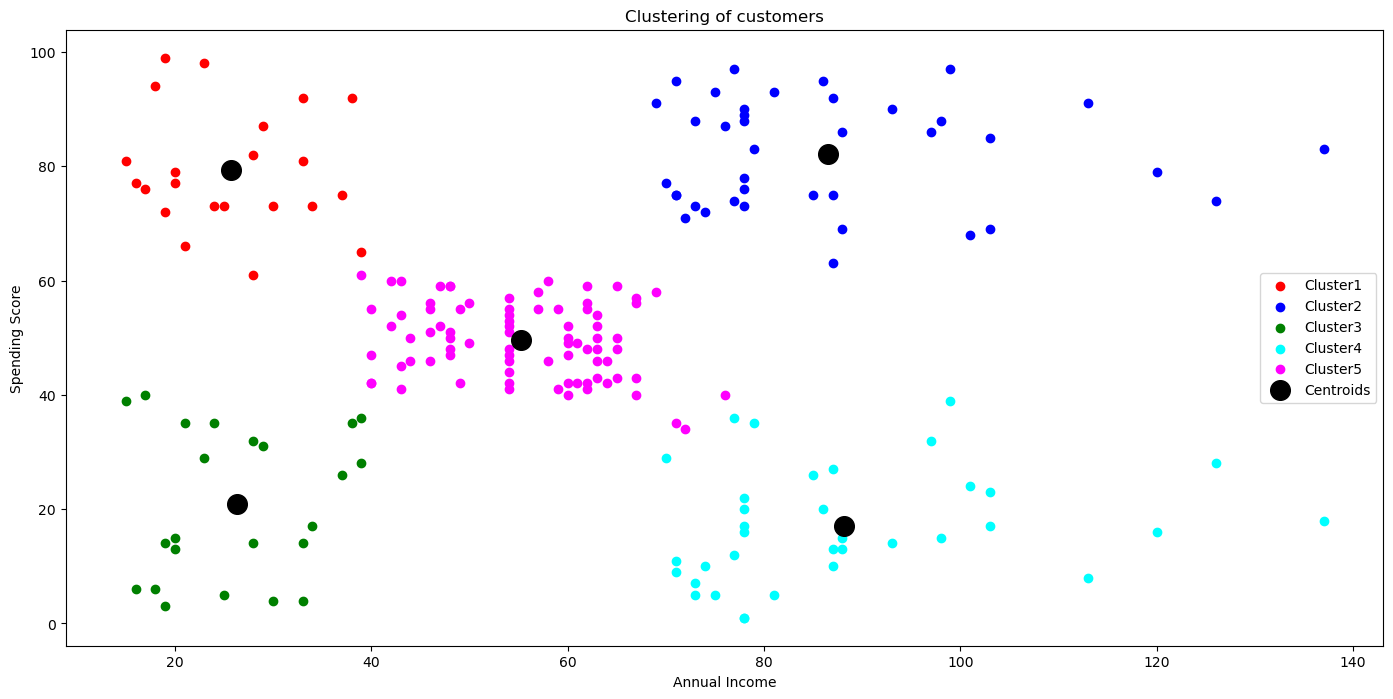

In [94]:
plt.figure(figsize=(17,8))
plt.scatter(X[y_means==0,0],X[y_means==0,1],color='red',label='Cluster1')
plt.scatter(X[y_means==1,0],X[y_means==1,1],color='blue',label='Cluster2')
plt.scatter(X[y_means==2,0],X[y_means==2,1],color='green',label='Cluster3')
plt.scatter(X[y_means==3,0],X[y_means==3,1],color='cyan',label='Cluster4')
plt.scatter(X[y_means==4,0],X[y_means==4,1],color='magenta',label='Cluster5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'black', label = 'Centroids')
plt.title("Clustering of customers")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.legend()
plt.show()

In [95]:
print("Task 2 Completed")

Task 2 Completed
